In [2]:
import os
import json
import requests

In [3]:
with open("data/flux_1_kontext_dev_grouped.json", "r", encoding="utf-8") as f:
    prompt = json.load(f)

In [8]:
prompt["6"]["inputs"]["text"] = "Convert it into a 3d doll style"

In [9]:
api_url = "http://127.0.0.1:8188/prompt"
response = requests.post(api_url, json={"prompt": prompt})
print(response.status_code)
print(response.text)
# 返回示例 {"prompt_id": "74ec912d-45fd-4109-b3dd-7d206c290ff0", "number": 6, "node_errors": {}}

200
{"prompt_id": "4bf08e9b-b4f5-4c72-bf26-7d7062872a02", "number": 7, "node_errors": {}}


In [7]:
response.text

'{"prompt_id": "74ec912d-45fd-4109-b3dd-7d206c290ff0", "number": 6, "node_errors": {}}'

In [14]:
history_url = "http://127.0.0.1:8188/history/4bf08e9b-b4f5-4c72-bf26-7d7062872a02"
response = requests.get(history_url)
print(response.status_code)
response.json()["4bf08e9b-b4f5-4c72-bf26-7d7062872a02"].keys()

200


dict_keys(['prompt', 'outputs', 'status', 'meta'])

In [15]:
response.json()["4bf08e9b-b4f5-4c72-bf26-7d7062872a02"]

{'prompt': [7,
  '4bf08e9b-b4f5-4c72-bf26-7d7062872a02',
  {'6': {'inputs': {'text': 'Convert it into a 3d doll style',
     'speak_and_recognation': True,
     'clip': ['38', 0]},
    'class_type': 'CLIPTextEncode',
    '_meta': {'title': 'CLIP Text Encode (Positive Prompt)'}},
   '8': {'inputs': {'samples': ['31', 0], 'vae': ['39', 0]},
    'class_type': 'VAEDecode',
    '_meta': {'title': 'VAE解码'}},
   '31': {'inputs': {'seed': 359572001684909,
     'steps': 20,
     'cfg': 1.0,
     'sampler_name': 'euler',
     'scheduler': 'simple',
     'denoise': 1.0,
     'model': ['37', 0],
     'positive': ['35', 0],
     'negative': ['135', 0],
     'latent_image': ['124', 0]},
    'class_type': 'KSampler',
    '_meta': {'title': 'K采样器'}},
   '35': {'inputs': {'guidance': 2.5, 'conditioning': ['177', 0]},
    'class_type': 'FluxGuidance',
    '_meta': {'title': 'Flux引导'}},
   '37': {'inputs': {'unet_name': 'flux1-dev-kontext_fp8_scaled.safetensors',
     'weight_dtype': 'fp8_e4m3fn'},
    '

200


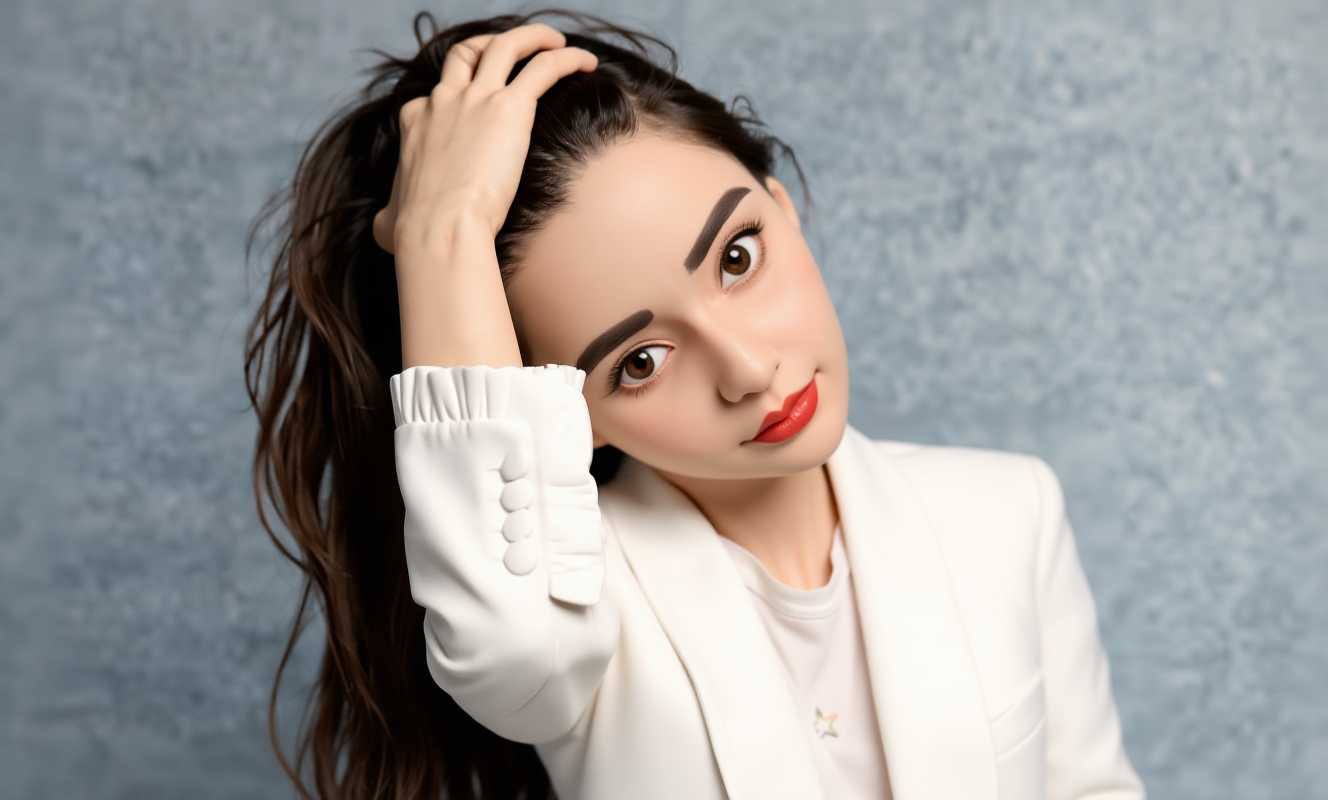

In [18]:
view_url = "http://127.0.0.1:8188/view"
query_pram = {"filename": "ComfyUI_01080_.png", "subfolder": "", "type": "output"}

response = requests.get(view_url, params=query_pram)
print(response.status_code)
len(response.content)
# 显示图片
from IPython.display import Image, display
display(Image(response.content))